In [3]:
import os
import glob
from tabulate import tabulate
from main import TaxiFarePredictor  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor


Loading data...
Data loaded successfully!
Initial shape of the data: (2964624, 5)
Dropping rows with missing values...
Shape after dropping missing values: (2964624, 5)
Removing rows with negative fare amounts...
Shape after removing negative fare amounts: (2929122, 5)
Removing outliers...
Shape after removing outliers from 'trip_distance': (2553566, 5)
Shape after removing outliers from 'total_amount': (2462875, 5)
Shape after removing outliers from 'trip_duration': (2415876, 5)
Sampling the data...
Shape after sampling: (100000, 5)
Scaling the features...
Splitting the data into training and testing sets...
Data split into training and testing sets successfully!
Generating exploratory plots...


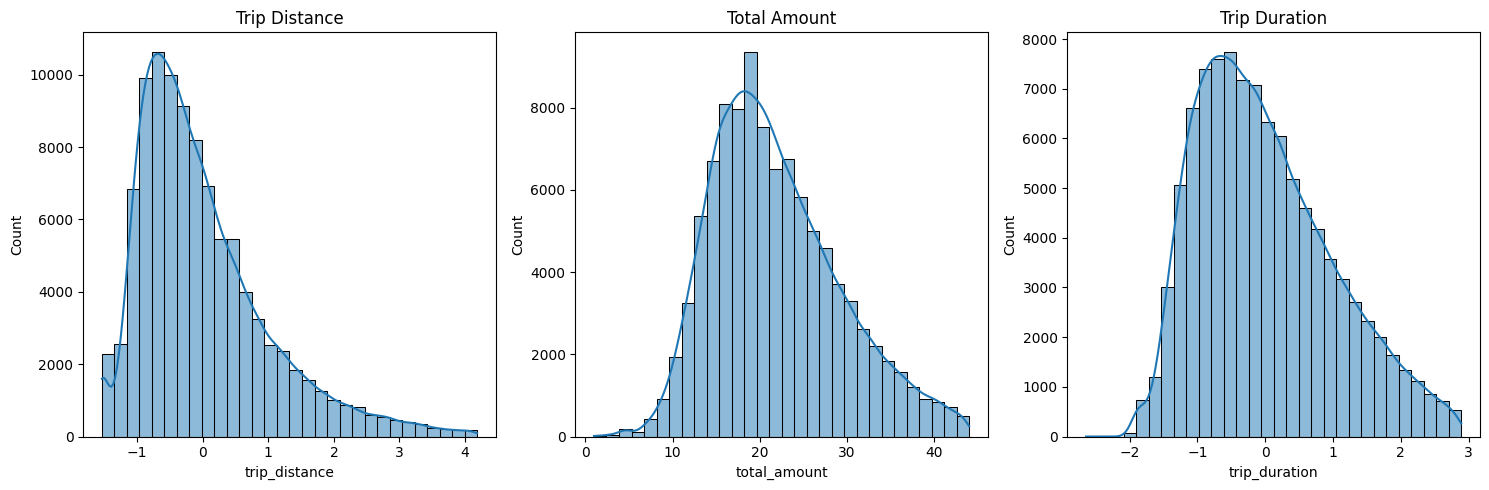

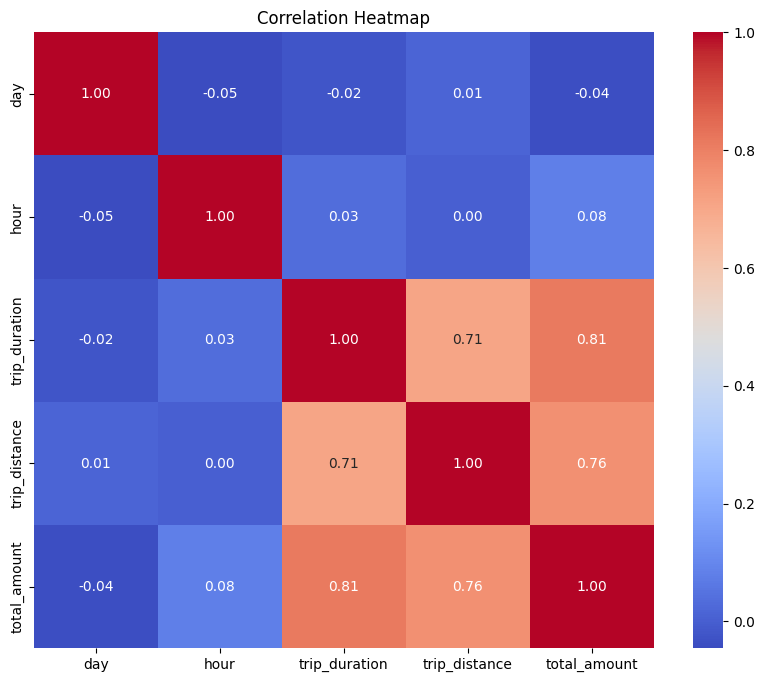

Exploratory plots generated successfully!


In [7]:
# Find the main.csv file in the dataset directory
dataset_directory = 'dataset/'
csv_files = glob.glob(os.path.join(dataset_directory, 'main.csv'))

if not csv_files:
    print("No main.csv file found in the dataset directory.")
else:
    csv_file_path = csv_files[0]
    predictor = TaxiFarePredictor(csv_file_path, n_samples=1_00_000, verbose=False)
    predictor.load_and_preprocess_data()


In [8]:
if predictor.df is not None and not predictor.df.empty:
    models = {
        "Linear Regression": {
            "model": LinearRegression(),
            "params": {}
        },
        "Support Vector Machine": {
            "model": SVR(),
            "params": {"C": 1.0, "epsilon": 0.2, "verbose": predictor.verbose}
        },
        "Random Forest": {
            "model": RandomForestRegressor(),
            "params": {"n_estimators": 100, "random_state": 42, "max_depth": 30, "max_features": "log2", "bootstrap": False, "criterion": "squared_error", "verbose": predictor.verbose}
        },
        "Gradient Boosting": {
            "model": GradientBoostingRegressor(),
            "params": {"n_estimators": 100, "random_state": 42, "max_depth": 3, "learning_rate": 0.1, "verbose": predictor.verbose}
        },
        "XGBoost": {
            "model": XGBRegressor(),
            "params": {"n_estimators": 100, "random_state": 42, "max_depth": 6, "learning_rate": 0.1, "verbosity": int(predictor.verbose)}
        }
    }


Training Linear Regression model...


Training Linear Regression: 100%|██████████| 100/100 [00:00<00:00, 181.28it/s]
c:\Users\giris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluating Linear Regression...

Linear Regression Evaluation Metrics:
+--------------------+----------+
| Metric             |    Value |
+====================+==========+
| MAE                | 2.87209  |
+--------------------+----------+
| RMSE               | 3.79237  |
+--------------------+----------+
| R²                 | 0.734264 |
+--------------------+----------+
| MAPE               | 0.152853 |
+--------------------+----------+
| Median AE          | 2.3676   |
+--------------------+----------+
| Explained Variance | 0.73431  |
+--------------------+----------+
Plotting Distribution of Predictions vs Actual Values for Linear Regression...


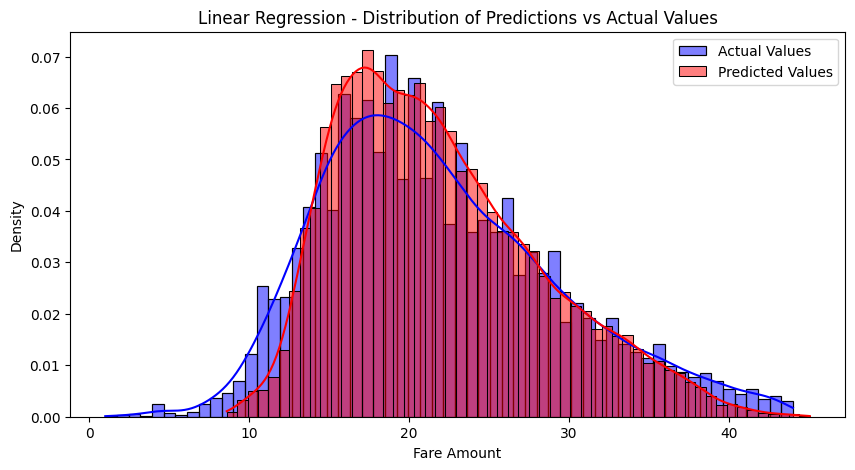

Plotting Residuals Distribution for Linear Regression...


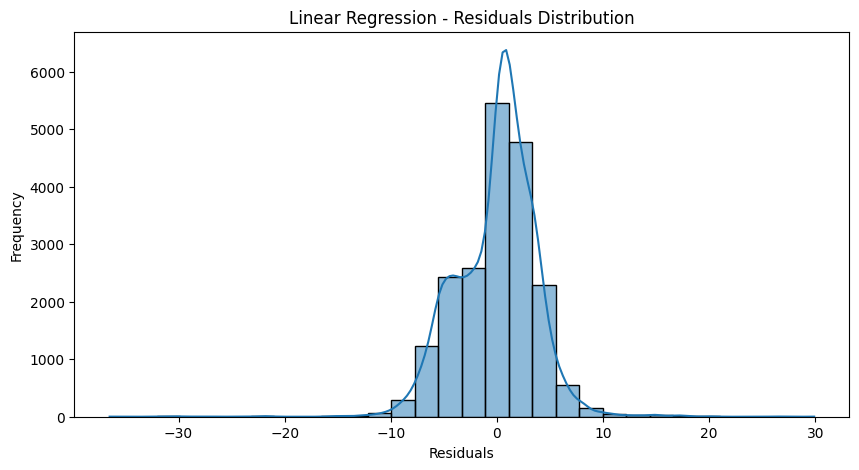

Plotting Prediction vs Actual Scatter Plot for Linear Regression...


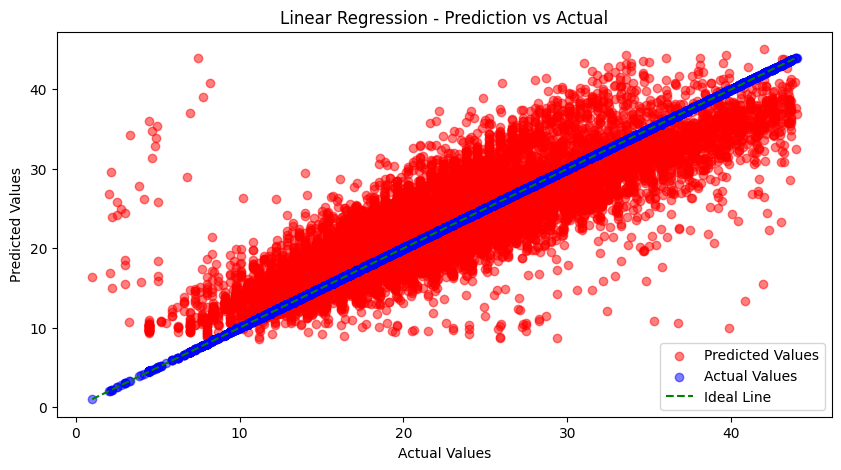

Plotting Residuals vs Predicted Values for Linear Regression...


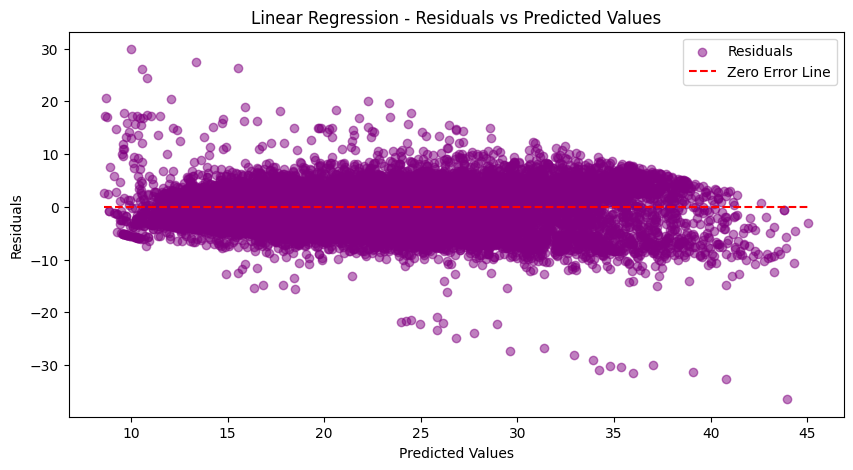

Training Support Vector Machine model...


Training Support Vector Machine:  14%|█▍        | 14/100 [50:01<5:07:19, 214.42s/it]


KeyboardInterrupt: 

In [9]:
results = {}
for name, model_info in models.items():
    model = model_info["model"]
    params = model_info["params"]
    trained_model = predictor.train_model(model, params, name)
    results[name] = predictor.evaluate_model(trained_model, name)


In [ ]:
headers = ["Model", "MAE", "RMSE", "R²", "MAPE", "Median AE", "Explained Variance"]
table = []
for name, metrics in results.items():
    table.append([name, metrics["MAE"], metrics["RMSE"], metrics["R²"], metrics["MAPE"], metrics["Median AE"], metrics["Explained Variance"]])

print(tabulate(table, headers, tablefmt="grid"))


+------------------------+---------+---------+----------+----------+-------------+----------------------+
| Model                  |     MAE |    RMSE |       R² |     MAPE |   Median AE |   Explained Variance |
+========================+=========+=========+==========+==========+=============+======================+
| Linear Regression      | 2.87209 | 3.79237 | 0.734264 | 0.152853 |     2.3676  |             0.73431  |
+------------------------+---------+---------+----------+----------+-------------+----------------------+
| Support Vector Machine | 2.70399 | 3.80201 | 0.732912 | 0.150013 |     1.86525 |             0.747182 |
+------------------------+---------+---------+----------+----------+-------------+----------------------+
| Random Forest          | 2.99627 | 3.9938  | 0.705285 | 0.159424 |     2.3665  |             0.705286 |
+------------------------+---------+---------+----------+----------+-------------+----------------------+
| Gradient Boosting      | 2.78819 | 3.62244 |